In [1]:
# Tomita 7
import torch
import torch.nn as nn
import math 
import os
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#print("Current Working Directory:", os.getcwd())
os.chdir( '/home/jupyter-nadia/bachelor-arbeit')

In [3]:
import Experiments.Model as Model
from Experiments.Pre_process_data import stats, stats_avg, min_max_stats

In [4]:
# get stats of language
max, train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = stats('data/Data_from_paper/Tomita-7')
print('max_len:', max, '\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)


max_len: 100 
train_src: 10000 
train_tgt: 10000 
bin0_src: 2000 
bin0_tgt: 2000 
bin1_src: 2000 
bin1_tgt: 2000


In [5]:
#avg
max, train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = stats_avg('data/Data_from_paper/Tomita-7')
print('max_len:', max, '\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)

max_len: 100 
train_src: 45.3693 
train_tgt: 90.7386 
bin0_src: 45.195 
bin0_tgt: 90.39 
bin1_src: 93.7055 
bin1_tgt: 187.411


In [6]:
#min,max
train_src, train_tgt, bin0_src, bin0_tgt, bin1_src, bin1_tgt = min_max_stats('data/Data_from_paper/Tomita-7')
print('\ntrain_src:', train_src, '\ntrain_tgt:', train_tgt, '\nbin0_src:', bin0_src, '\nbin0_tgt:', bin0_tgt, '\nbin1_src:', bin1_src, '\nbin1_tgt:', bin1_tgt)


train_src: [7, 50] 
train_tgt: [14, 100] 
bin0_src: [8, 50] 
bin0_tgt: [16, 100] 
bin1_src: [51, 100] 
bin1_tgt: [102, 200]


In [7]:
# initialize the plot values for accuracy 
bin1 = [0,0,0,0,0,0,0,0]  
bin0 = [0,0,0,0,0,0,0,0]  
bin1_uni = [0,0,0,0,0,0,0,0]  
bin0_uni = [0,0,0,0,0,0,0,0]    

In [8]:
# 1. Recurrent (# 6 layers in the main code )
# lesser layers give us slightly worse accuracy
# to beat 4 layers 71%

In [9]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = False
no_posi_encoding = False
rope = False
tomita_7_rec = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 4, rope = rope)

In [10]:
epochs = 100
tomita_7_rec.train_eval(epochs)

Epoch [1/100], Loss: 0.000013, dev Accuracy: 100.00%
Epoch [2/100], Loss: 0.000002, dev Accuracy: 100.00%
Epoch [3/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [4/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [5/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev A

In [18]:
bin0[5] = tomita_7_rec.test(0)

accuracy of all bin 0 is:  100.0 %


In [19]:
bin1[5] = tomita_7_rec.test(1)

accuracy of all bin 1 is:  100.0 %


In [20]:
rec, rec_n = tomita_7_rec.get_losses('Recurrent')

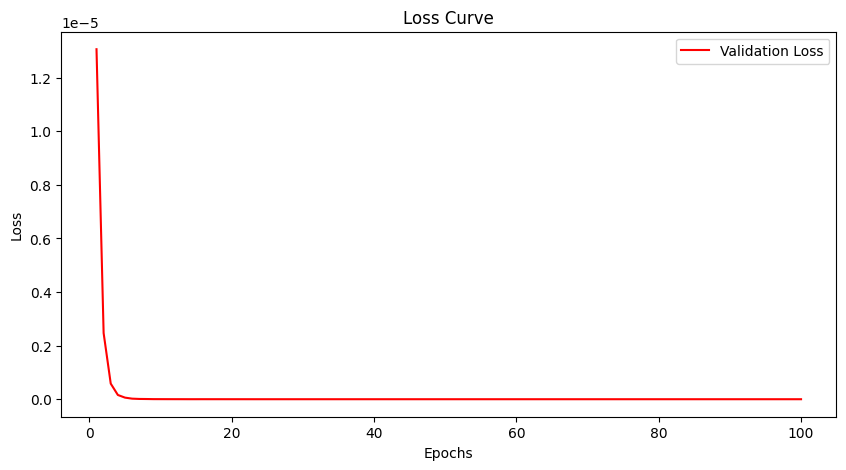

In [21]:
tomita_7_rec.visualize(epochs)

In [22]:
#2. Universal (# Layers = 8,
# accuracy of all bin 0 is:  99.6 %,
#accuracy of all bin 1 is:  98.15 %) No positional encoding
# No posi encoding

In [25]:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = False
no_posi_encoding = True
universal = True
tomita_7_uni = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 8, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, num_layers =4)

In [26]:
epochs = 100
tomita_7_uni.train_eval(epochs)

Epoch [1/100], Loss: 0.000014, dev Accuracy: 100.00%
Epoch [2/100], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [3/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [4/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [5/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev A

In [27]:
bin0_uni[0] = tomita_7_uni.test(0)

accuracy of all bin 0 is:  100.0 %


In [28]:
bin1_uni[0] =  tomita_7_uni.test(1)

accuracy of all bin 1 is:  100.0 %


In [29]:
uni, uni_n = tomita_7_uni.get_losses('Universal')

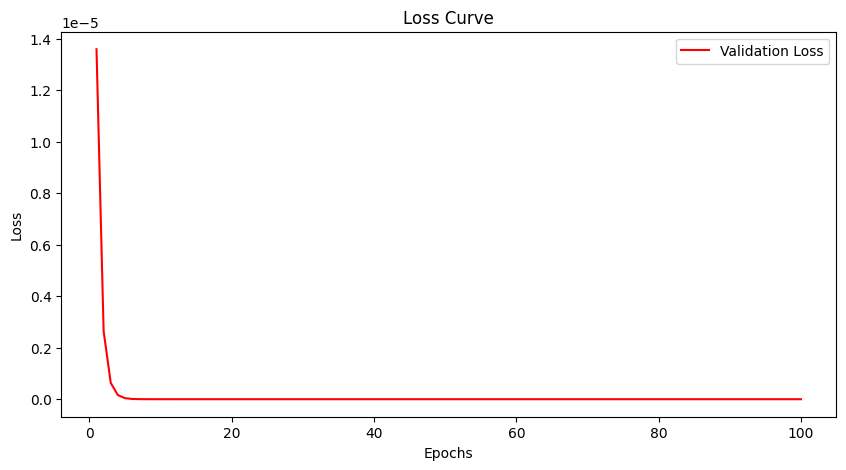

In [30]:
 tomita_7_uni.visualize(epochs)

In [31]:
#3. No positional encoding: 

In [32]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = False
no_posi_encoding = True
tomita_7_np = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, no_posi_encoding= no_posi_encoding, layer_number_main= 4)

In [33]:
epochs = 100
tomita_7_np.train_eval(epochs)

Epoch [1/100], Loss: 0.000014, dev Accuracy: 100.00%
Epoch [2/100], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [3/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [4/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [5/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev A

In [34]:
bin0[0] = tomita_7_np.test(0)

accuracy of all bin 0 is:  100.0 %


In [35]:
bin1[0] = tomita_7_np.test(1)

accuracy of all bin 1 is:  100.0 %


In [36]:
nop, nop_n = tomita_7_np.get_losses('No Positional Encoding')

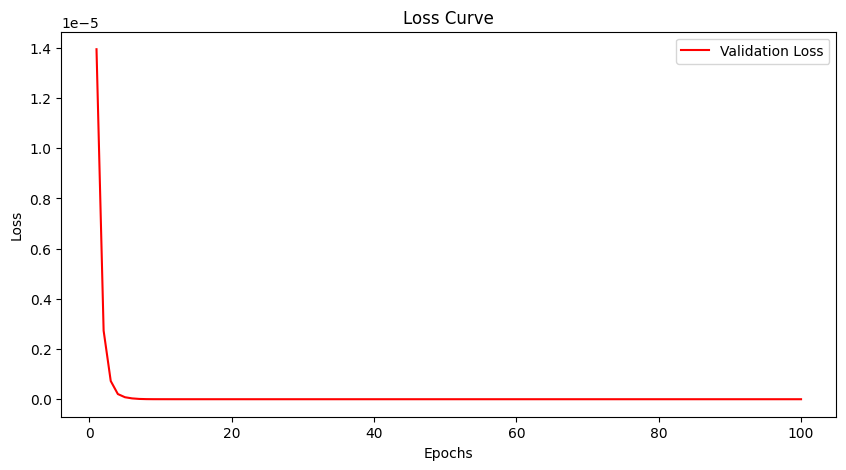

In [37]:
 tomita_7_np.visualize(epochs)

In [38]:
#4. Standard Positional encoding

In [39]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = False
no_posi_encoding = False
tomita_7_sin = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, no_posi_encoding= no_posi_encoding, layer_number_main= 4)

In [40]:
epochs = 100
tomita_7_sin.train_eval(epochs)

Epoch [1/100], Loss: 0.000014, dev Accuracy: 100.00%
Epoch [2/100], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [3/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [4/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [5/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev A

In [41]:
bin0[1] = tomita_7_sin.test(0)

accuracy of all bin 0 is:  100.0 %


In [42]:
bin1[1] = tomita_7_sin.test(1)

accuracy of all bin 1 is:  100.0 %


In [43]:
sin, sin_n = tomita_7_sin.get_losses('Sin')

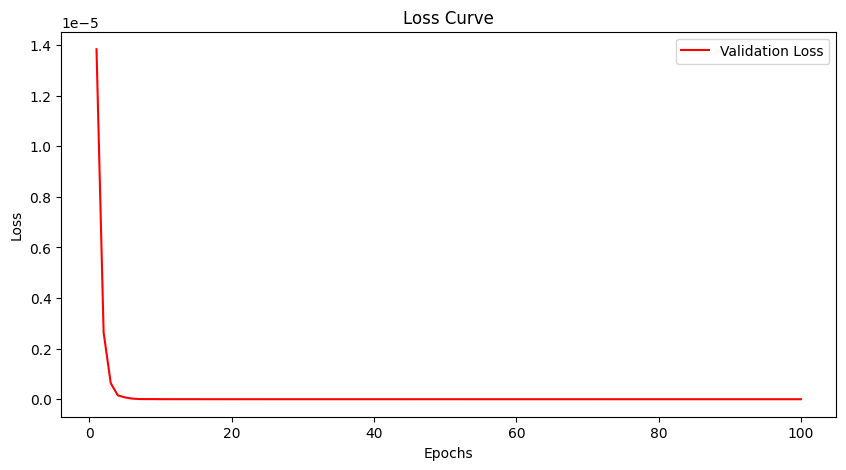

In [44]:
tomita_7_sin.visualize(epochs)

In [45]:
#5. Cos Positional encoding 

In [46]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = False
no_posi_encoding = False
tomita_7_cos = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, pos_enc= 'cos', no_posi_encoding= no_posi_encoding, layer_number_main= 4)


In [47]:
epochs = 100
tomita_7_cos.train_eval(epochs)

Epoch [1/100], Loss: 0.000014, dev Accuracy: 100.00%
Epoch [2/100], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [3/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [4/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [5/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev A

In [48]:
bin0[2] = tomita_7_cos.test(0)

accuracy of all bin 0 is:  100.0 %


In [49]:
bin1[2] = tomita_7_cos.test(1)

accuracy of all bin 1 is:  100.0 %


In [50]:
cos, cos_n = tomita_7_cos.get_losses('Cos')

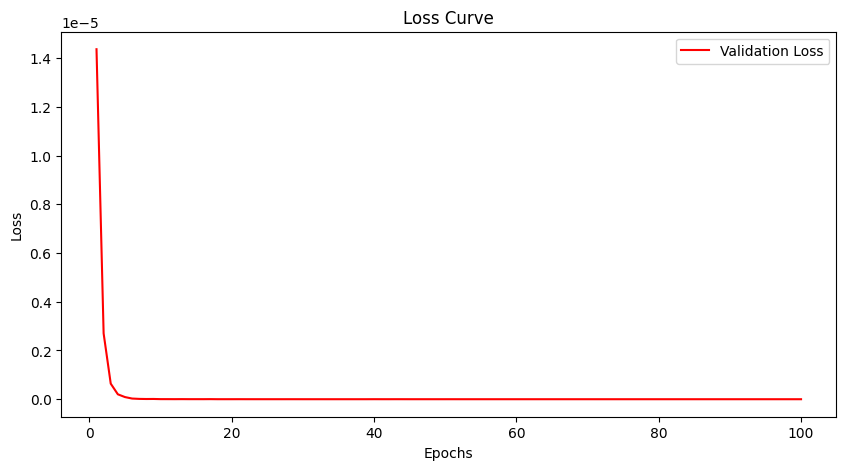

In [51]:
tomita_7_cos.visualize(epochs)

In [52]:
#6. learnable 

In [53]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = False
no_posi_encoding = False
tomita_7_learn = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, pos_enc= 'learnable', no_posi_encoding= no_posi_encoding, layer_number_main= 4)

In [54]:
epochs = 100
tomita_7_learn.train_eval(epochs)

Epoch [1/100], Loss: 0.000014, dev Accuracy: 100.00%
Epoch [2/100], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [3/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [4/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [5/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.004257, dev Accuracy: 98.65%
Epoch [19/100], Loss: 0.000000, dev Ac

In [55]:
bin0[3] = tomita_7_learn.test(0)

accuracy of all bin 0 is:  100.0 %


In [56]:
bin1[3] = tomita_7_learn.test(1)

accuracy of all bin 1 is:  100.0 %


In [57]:
learn, learn_n = tomita_7_learn.get_losses('Learnable')

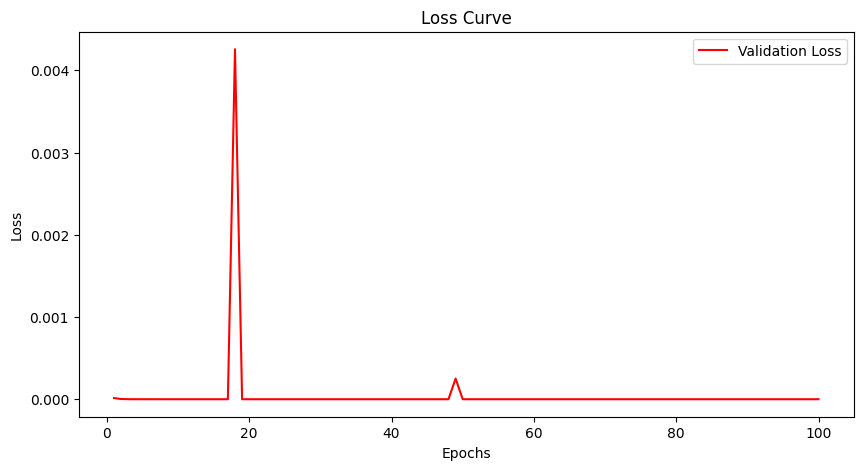

In [58]:
tomita_7_learn.visualize(epochs)

In [59]:
#7. learnable Period 

In [60]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = False
no_posi_encoding = False
tomita_7_lp = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, pos_enc= 'learn_period', no_posi_encoding= no_posi_encoding, layer_number_main= 4)

In [61]:
epochs = 100
tomita_7_lp.train_eval(epochs)

Epoch [1/100], Loss: 0.000014, dev Accuracy: 100.00%
Epoch [2/100], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [3/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [4/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [5/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev A

In [62]:
bin0[4] = tomita_7_lp.test(0)

accuracy of all bin 0 is:  100.0 %


In [63]:
bin1[4] = tomita_7_lp.test(1)

accuracy of all bin 1 is:  100.0 %


In [64]:
lp, lp_n = tomita_7_lp.get_losses('Learnable Period')

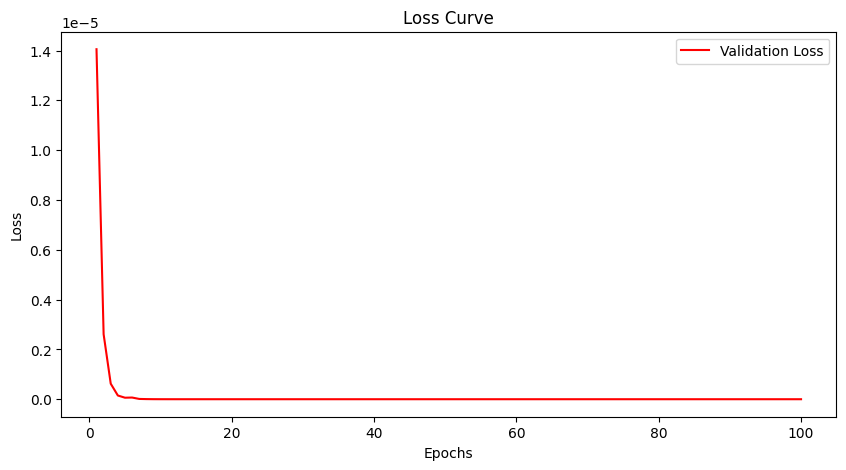

In [65]:
tomita_7_lp.visualize(epochs)

In [66]:
#8 rope

In [67]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = False
no_posi_encoding = False
rope= True
tomita_7_rope = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 4, rope= rope)

In [68]:
epochs = 100
tomita_7_rope.train_eval(epochs)

Epoch [1/100], Loss: 0.000045, dev Accuracy: 99.90%
Epoch [2/100], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [3/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [4/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [5/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev Ac

In [69]:
bin0[7] = tomita_7_rope.test(0)

accuracy of all bin 0 is:  100.0 %


In [70]:
bin1[7] = tomita_7_rope.test(1)

accuracy of all bin 1 is:  63.95 %


In [71]:
rope, rope_n = tomita_7_rope.get_losses('RoPE')

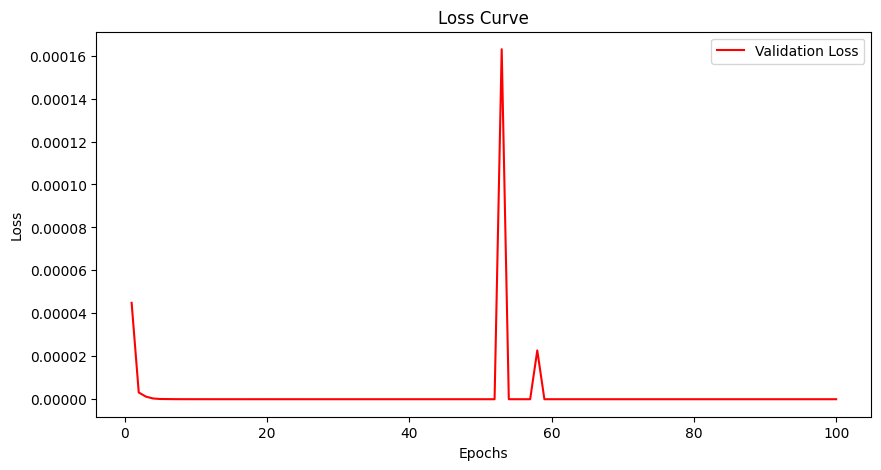

In [72]:
tomita_7_rope.visualize(epochs)

In [73]:
#9 Alibi

In [74]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = True
universal = False
no_posi_encoding = False
rope= False
tomita_7_alibi = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, no_posi_encoding= no_posi_encoding, universal = universal, layer_number_main= 4, rope= rope)

In [75]:
epochs = 100
tomita_7_alibi.train_eval(epochs)

Epoch [1/100], Loss: 0.000015, dev Accuracy: 100.00%
Epoch [2/100], Loss: 0.000003, dev Accuracy: 100.00%
Epoch [3/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [4/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [5/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev A

In [76]:
bin0[6] = tomita_7_alibi.test(0)

accuracy of all bin 0 is:  100.0 %


In [77]:
bin1[6] = tomita_7_alibi.test(1)

accuracy of all bin 1 is:  100.0 %


In [78]:
alibi, alibi_n = tomita_7_alibi.get_losses('ALiBi')

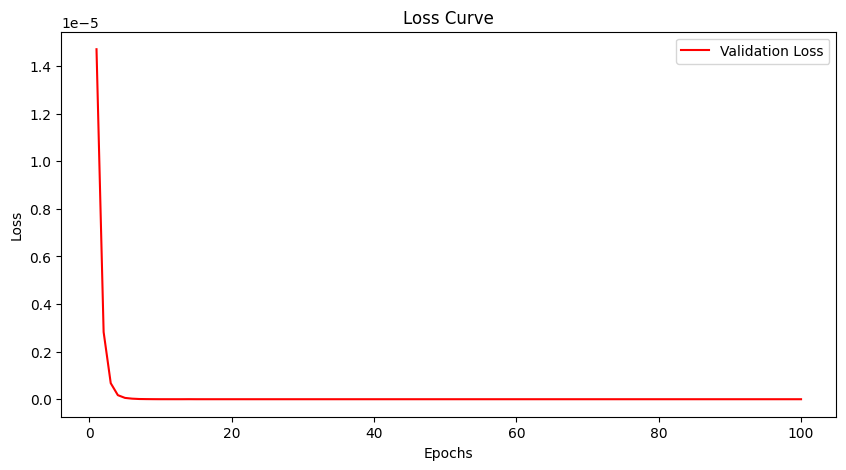

In [79]:
tomita_7_alibi.visualize(epochs)

In [80]:
#10. Combos uni+recurrent

In [81]:
# Tomita 7:

url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = True
no_posi_encoding = False
rope= False
tomita_7_uni_rec = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, pos_enc= 'recurrent', no_posi_encoding= no_posi_encoding, universal = universal, num_layers =4, rope= rope)

In [82]:
epochs = 100
tomita_7_uni_rec.train_eval(epochs)

Epoch [1/100], Loss: 0.000013, dev Accuracy: 100.00%
Epoch [2/100], Loss: 0.000002, dev Accuracy: 100.00%
Epoch [3/100], Loss: 0.000001, dev Accuracy: 100.00%
Epoch [4/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [5/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [6/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [7/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [8/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [9/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [10/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [11/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [12/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [13/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [14/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [15/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [16/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [17/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [18/100], Loss: 0.000000, dev Accuracy: 100.00%
Epoch [19/100], Loss: 0.000000, dev A

In [83]:
bin0_uni[5] = tomita_7_uni_rec.test(0)

accuracy of all bin 0 is:  100.0 %


In [84]:
bin1_uni[5] = tomita_7_uni_rec.test(1)

accuracy of all bin 1 is:  100.0 %


In [85]:
rec_uni, rec_uni_n = tomita_7_uni_rec.get_losses('Universal + Recurrent')

In [86]:
tomita_7_uni_rec.visualize(epochs)

NameError: name 'tomita_7' is not defined

In [66]:
#11. combos: universal + cos

In [ ]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_7_uni_cos = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, pos_enc= 'cos',no_posi_encoding= no_posi_encoding, num_layers= 4, rope= rope)

In [ ]:
epochs = 100
tomita_7_uni_cos.train_eval(epochs)

In [ ]:
bin0_uni[2] = tomita_7_uni_cos.test(0)

In [ ]:
bin1_uni[2] = tomita_7_uni_cos.test(1)

In [ ]:
cos_uni, cos_uni_n = tomita_7_uni_cos.get_losses('Universal + Cos')

In [ ]:
tomita_7_uni_cos.visualize(epochs)

In [72]:
#12. combos: universal + learnable

In [ ]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_7_uni_learn = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, pos_enc= 'learnable',no_posi_encoding= no_posi_encoding, num_layers= 4, rope= rope)

In [ ]:
epochs = 100
tomita_7_uni_learn.train_eval(epochs)

In [ ]:
bin0_uni[3] = tomita_7_uni_learn.test(0)

In [ ]:
bin1_uni[3] = tomita_7_uni_learn.test(1)

In [ ]:
learn_uni, learn_uni_n = tomita_7_uni_learn.get_losses('Universal + Learnable')

In [ ]:
tomita_7_uni_learn.visualize(epochs)

In [78]:
#13. combos: universal + learnable period

In [ ]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_7_uni_lp = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, pos_enc= 'learn_period',no_posi_encoding= no_posi_encoding, num_layers= 4, rope= rope)

In [ ]:
epochs = 100
tomita_7_uni_lp .train_eval(epochs)

In [ ]:
bin0_uni[4] = tomita_7_uni_lp .test(0)

In [ ]:
bin1_uni[4] = tomita_7_uni_lp .test(1)

In [ ]:
lp_uni, lp_uni_n = tomita_7_uni_lp.get_losses('Universal + Learnable Period')

In [ ]:
tomita_7_uni_lp .visualize(epochs)

In [84]:
#14. combos: universal + standard

In [ ]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = True
no_posi_encoding = False
rope = False
tomita_7_uni_sin  = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, no_posi_encoding= no_posi_encoding, num_layers= 4, rope= rope)

In [ ]:
epochs = 100
tomita_7_uni_sin.train_eval(epochs)

In [ ]:
bin1_uni[1] = tomita_7_uni_sin.test(0)

In [ ]:
bin0_uni[1] = tomita_7_uni_sin.test(1)

In [ ]:
sin_uni, sin_uni_n = tomita_7_uni_sin.get_losses('Universal + Sin')

In [ ]:
tomita_7_uni_sin.visualize(epochs)

In [90]:
#15. combos: universal + alibi

In [ ]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = True
universal = True
no_posi_encoding = False
rope = False
tomita_7_uni_alibi = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, no_posi_encoding= no_posi_encoding, num_layers= 4, rope= rope)

In [ ]:
epochs = 100
tomita_7_uni_alibi.train_eval(epochs)

In [ ]:
bin0_uni[6] =  tomita_7_uni_alibi.test(0)

In [ ]:
bin1_uni[6] = tomita_7_uni_alibi.test(1)

In [ ]:
alibi_uni, alibi_uni_n = tomita_7_uni_alibi.get_losses('Universal + ALiBi')

In [ ]:
tomita_7_uni_alibi.visualize(epochs)

In [96]:
#16. combos: universal + rope

In [ ]:
# Tomita 7:
url = 'data/Data_from_paper/Tomita-7'
alibi = False
universal = True
no_posi_encoding = False
rope = True
tomita_7_uni_rope = Model.run_model(url, learning_rate = 0.001, batch_size = 32, embedding_dim =32, nheads= 4, split = 0.8, optimizer = 'RMSPROP', inner_layer_dim = 32, scheduler_lr= 200000, dropout = 0.2, alibi = alibi, no_posi_encoding= no_posi_encoding, num_layers= 4, rope= rope)

In [ ]:
epochs = 100
tomita_7_uni_rope.train_eval(epochs)

In [ ]:
bin0_uni[7] = tomita_7_uni_rope.test(0)

In [ ]:
bin1_uni[7] = tomita_7_uni_rope.test(1)

In [ ]:
rope_uni, rope_uni_n = tomita_7_uni_rope.get_losses('Universal + RoPE')

In [ ]:
tomita_7_uni_rope.visualize(epochs)

In [ ]:
# plot the losses
epochs =100
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, epochs + 1), uni, label=uni_n, color='cyan')
plt.plot(np.arange(1, epochs + 1), rec_uni, label=rec_uni_n, color='black')
plt.plot(np.arange(1, epochs + 1), learn_uni, label=learn_uni_n, color='orange')
plt.plot(np.arange(1, epochs + 1), lp_uni, label=lp_uni_n, color='violet')
plt.plot(np.arange(1, epochs + 1), cos_uni, label=cos_uni_n, color='yellow')
plt.plot(np.arange(1, epochs + 1),sin_uni, label=sin_uni_n, color='green')
plt.plot(np.arange(1, epochs + 1), rope_uni, label=rope_uni_n, color='red')
plt.plot(np.arange(1, epochs + 1), alibi_uni, label=alibi_uni_n, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [ ]:
# plot the losses no universal
epochs = 100
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, epochs + 1), nop, label=nop_n, color='cyan')
plt.plot(np.arange(1, epochs + 1), rec, label=rec_n, color='black')
plt.plot(np.arange(1, epochs + 1), learn, label=learn_n, color='orange')
plt.plot(np.arange(1, epochs + 1), lp, label=lp_n, color='violet')
plt.plot(np.arange(1, epochs + 1), cos, label=cos_n, color='yellow')
plt.plot(np.arange(1, epochs + 1),sin, label=sin_n, color='green')
plt.plot(np.arange(1, epochs + 1), rope, label=rope_n, color='red')
plt.plot(np.arange(1, epochs + 1), alibi, label=alibi_n, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

[0, 0, 0, 0, 0, 100.0, 0, 0]
[0, 0, 0, 0, 0, 100.0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]


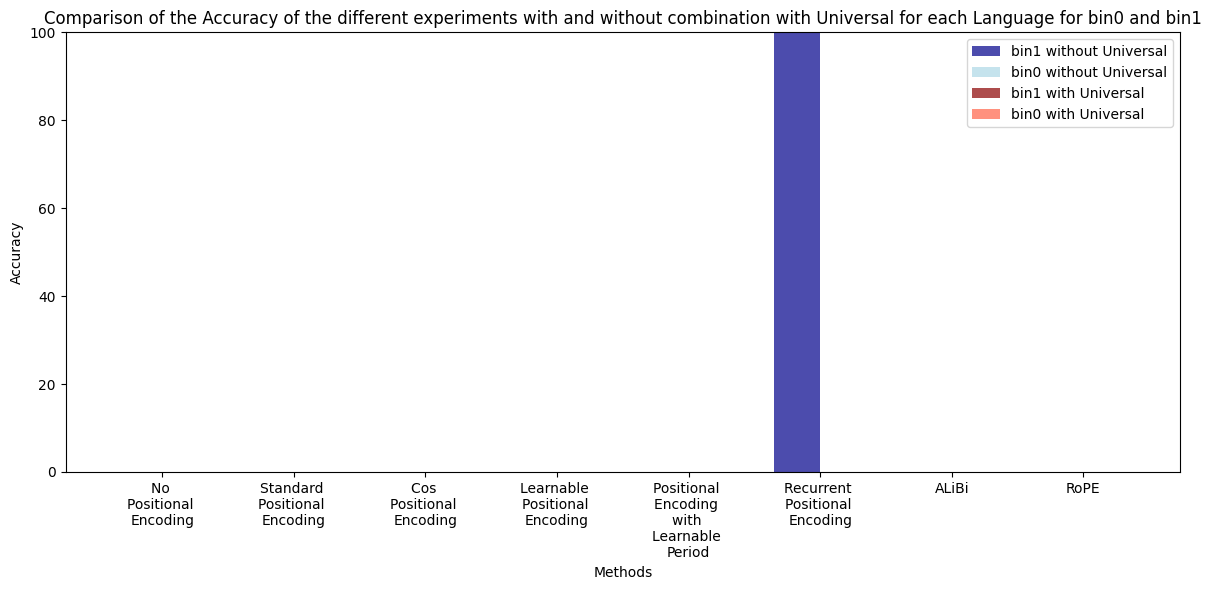

In [17]:
# Plots
categories = ['No \nPositional \nEncoding', 'Standard \nPositional \nEncoding', 'Cos \nPositional \nEncoding', 'Learnable \nPositional \nEncoding', 'Positional \nEncoding \nwith \nLearnable \nPeriod',  'Recurrent \nPositional \nEncoding','ALiBi', 'RoPE']

print(bin0)
print(bin1)
print(bin0_uni)
print(bin1_uni)
# Set the width of each bar
bar_width = 0.35

# Calculate the differences between bin0 and bin1 values
diff_bin0_bin1 = [b0 - b1 for b0, b1 in zip(bin0, bin1)]

# Calculate the differences between bin0_uni and bin1_uni values
diff_bin0_uni_bin1_uni = [b0_uni - b1_uni for b0_uni, b1_uni in zip(bin0_uni, bin1_uni)]

# Create an array of indices for x-axis placement
indices = np.arange(len(categories))

# Create the bar plot for the first pair
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(indices - bar_width / 2, bin1, bar_width, label='bin1 without Universal', alpha=0.7, color='#00008B')
plt.bar(indices - bar_width / 2, diff_bin0_bin1, bar_width, label='bin0 without Universal', bottom=bin1, alpha=0.7, color='#ADD8E6')


# Create the bar plot for the second pair
plt.bar(indices + bar_width / 2, bin1_uni, bar_width, label='bin1 with Universal', alpha=0.7, color = '#8B0000')
plt.bar(indices + bar_width / 2, diff_bin0_uni_bin1_uni, bar_width, label='bin0 with Universal', bottom=bin1_uni, alpha=0.7, color='#FF6347')

# Customize the plot
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Comparison of the Accuracy of the different experiments with and without combination with Universal for each Language for bin0 and bin1')
plt.xticks(indices, categories)
plt.ylim(0, 100)  # Set the y-axis range from 0% to 100% to accommodate both pairs
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()